# Performance testing results

We provide benchmarks for the prediction and recommendation endpoints for different algorithms using our reference machine of four workers sending 1000 requests to the recommendation server. The results for each algorithm are detailed below.

## Setup

In [13]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
class ConfigReader:
    def get_value(self, key):
        with open('config.json') as json_data_file:
            data = json.load(json_data_file)
        return data[key]

In [15]:
results_folder = "results/"

def print_stats_from_file(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))  
    times = obj['times']
    time_taken_all = obj['time_taken_all']
    num_requests = obj['num_requests']
    print(f'Number of requests: {num_requests}')    
    print(f'Total response time: {round(time_taken_all, 6)}')
    print(f'Throughput (requests per second): {round(num_requests / time_taken_all, 6)}')
    print(f'Peak response time: {round(max(times), 6)}')
    print(f'Mean response time: {round(np.mean(times), 6)}')
    print(f'Median response time: {round(np.median(times), 6)}')
    print(f'99 percentile: {round(np.quantile(times, 0.99), 6)}')    
    
def plot_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))
    resp_time_per_request = obj['times']
    plt.plot(resp_time_per_request)
    plt.show()
    
def hist_numbers(file_name):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    resp_time_per_request = obj['times']
    plt.hist(resp_time_per_request, bins='auto')
    plt.title('Number of requests over time')
    plt.xlabel('Time')
    plt.ylabel('Requests')
    plt.show()
    
def create_df(file_name, algo, num_workers):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    df = pd.DataFrame(obj['times'])
    df['Workers'] = num_workers
    df['Algorithm'] = algo    
    df.rename(columns={0:'Time'}, inplace=True)
    return df

def create_df_pred_perf(file_name, algo):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    df = pd.DataFrame(obj['times'])
    df['Algorithm'] = algo    
    df.rename(columns={0:'Time'}, inplace=True)
    return df 

### Get config values

In [16]:
reader = ConfigReader()
n_rand_users = num_requests = reader.get_value("num_requests")
base_url = reader.get_value("rec_server_base_url")
n_recs = reader.get_value("n_recs")
items = reader.get_value("items")
pred_algos = reader.get_value("pred_algos")
rec_algos = reader.get_value("rec_algos")
lk_recserver_algos = reader.get_value('lk_recserver_algos')
linear_speedup_algos = reader.get_value("linear_speedup_algos")
workers_config = reader.get_value("workers_config")

## Show results

### Predict and recommend endpoints from server for canonical config

#### Predictions for different algorithms

In [12]:
df = pd.DataFrame({'Time': [], 'Algorithm': []})  
for algo in pred_algos:
    print(f'Algorithm: {algo}')
    file_name = f'preds_{algo}_workers_4_num_req_{num_requests}.pickle'  
    print_stats_from_file(file_name)
#    hist_numbers(file_name)

    df = df.append(create_df_pred_perf(file_name, algo), ignore_index=True)
    print('---------------------')
    print('')

Algorithm: bias
Number of requests: 1000
Total response time: 10.95988
Throughput (requests per second): 91.241877
Peak response time: 0.100539
Mean response time: 0.08653
Median response time: 0.086374
99 percentile: 0.094625
---------------------

Algorithm: itemitem
Number of requests: 1000
Total response time: 51.418465
Throughput (requests per second): 19.448266
Peak response time: 3.846257
Mean response time: 0.406571
Median response time: 0.339282
99 percentile: 1.342113
---------------------

Algorithm: useruser
Number of requests: 1000
Total response time: 21.56684
Throughput (requests per second): 46.367479
Peak response time: 0.20437
Mean response time: 0.170963
Median response time: 0.170497
99 percentile: 0.192034
---------------------

Algorithm: biasedmf
Number of requests: 1000
Total response time: 10.872896
Throughput (requests per second): 91.971821
Peak response time: 0.102771
Mean response time: 0.085894
Median response time: 0.085512
99 percentile: 0.094476
-------

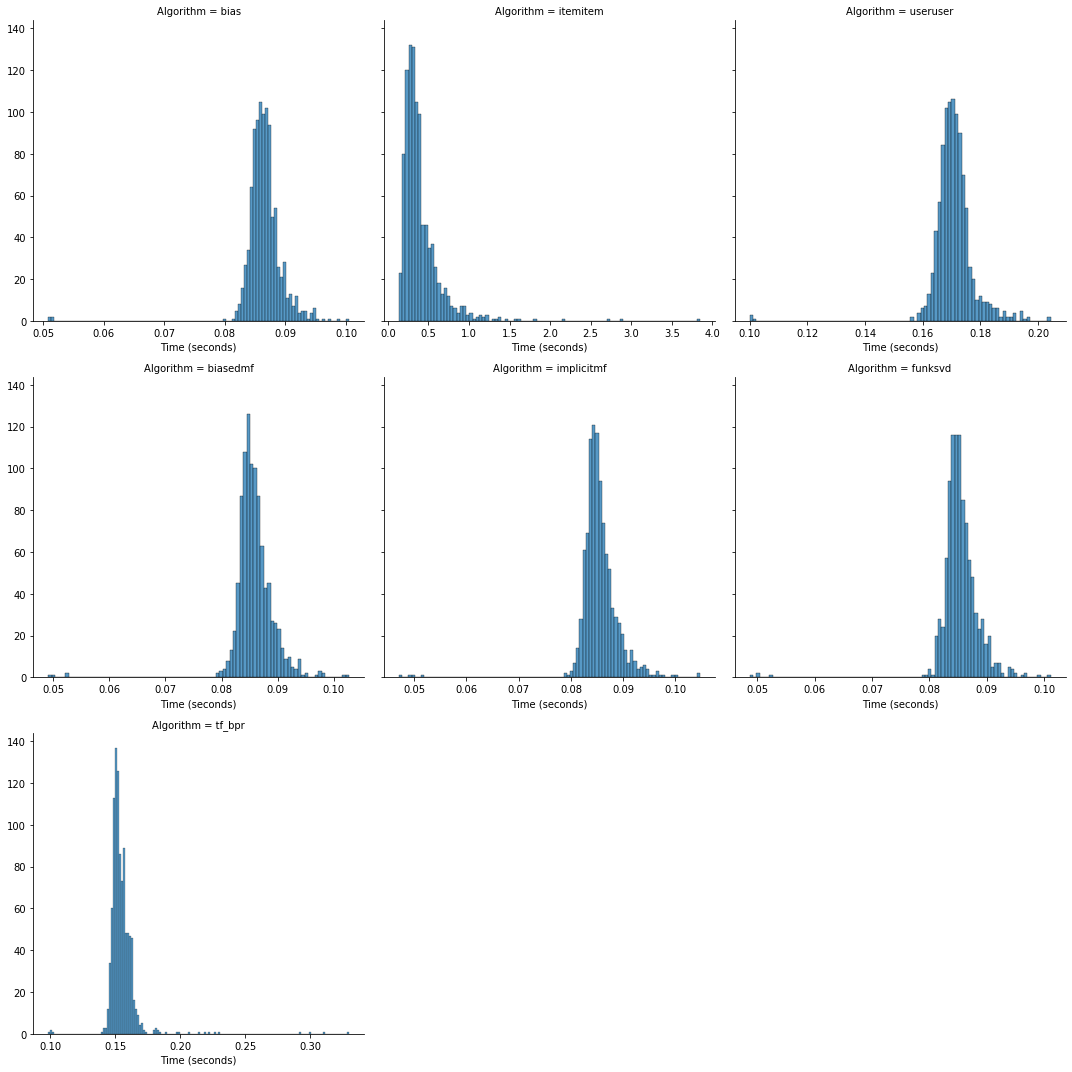

In [48]:
g = sns.FacetGrid(df, col="Algorithm", col_wrap=3, sharex=False, height=5)
g.map(sns.histplot, "Time")
for i in range(7):
    g.axes[i].set_xlabel('Time (seconds)')
    
g.fig.tight_layout()
plt.show()

#### Recommendations

In [9]:
df_recs = pd.DataFrame({'Time': [], 'Algorithm': []})  
for algo_rec in rec_algos:
    print(f'Algorithm: {algo_rec}')
    file_name = f'recs_{algo_rec}_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
#    hist_numbers(file_name)
    df_recs = df_recs.append(create_df_pred_perf(file_name, algo_rec), ignore_index=True)
    print('---------------------')
    print('')

Algorithm: popular
Number of requests: 1000
Total response time: 0.903492
Throughput (requests per second): 1106.816986
Peak response time: 0.011268
Mean response time: 0.006261
Median response time: 0.006268
99 percentile: 0.007818
---------------------

Algorithm: implicitmf
Number of requests: 1000
Total response time: 13.089262
Throughput (requests per second): 76.398501
Peak response time: 0.180205
Mean response time: 0.103785
Median response time: 0.099185
99 percentile: 0.159445
---------------------

Algorithm: tf_bpr
Number of requests: 1000
Total response time: 22.748673
Throughput (requests per second): 43.958608
Peak response time: 0.338504
Mean response time: 0.180518
Median response time: 0.179653
99 percentile: 0.225028
---------------------

Algorithm: itemitem
Number of requests: 1000
Total response time: 33.160646
Throughput (requests per second): 30.156228
Peak response time: 1.261466
Mean response time: 0.263223
Median response time: 0.226557
99 percentile: 0.748358

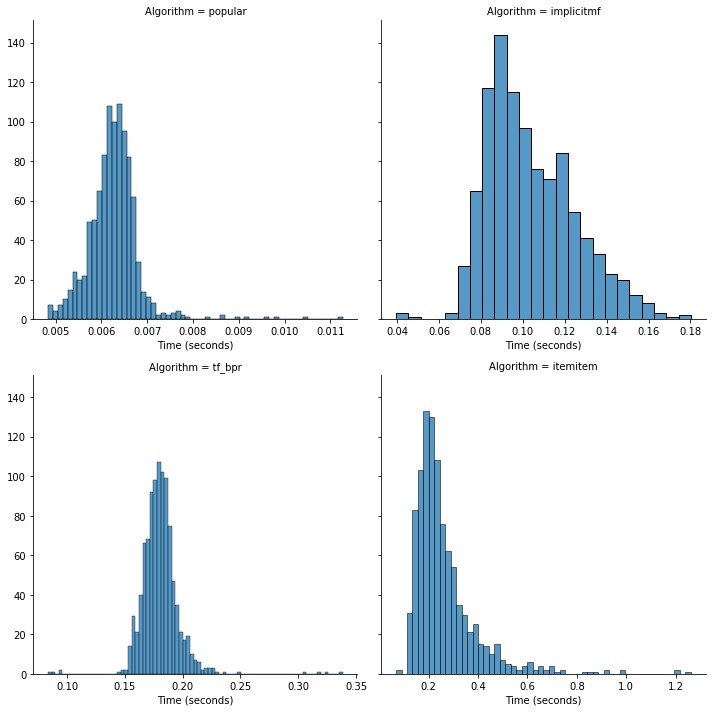

In [11]:
g = sns.FacetGrid(df_recs, col="Algorithm", col_wrap=2, sharex=False, height=5)
g.map(sns.histplot, "Time")
for i in range(4):
    g.axes[i].set_xlabel('Time (seconds)')
    
g.fig.tight_layout()
plt.show()

### Lenskit

In [9]:
def create_df_lk(file_name, algo, type_result):
    obj = pickle.load(open(results_folder + file_name, "rb"))    
    df = pd.DataFrame(obj['times'])
    df['Type'] = type_result
    df['Algorithm'] = algo    
    df.rename(columns={0:'Time'}, inplace=True)
    return df 

Algo: bias
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.494293
Throughput (requests per second): 2023.090986
Peak response time: 0.006024
Mean response time: 0.000424
Median response time: 0.000417
99 percentile: 0.000445
------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 10.940877
Throughput (requests per second): 91.400348
Peak response time: 0.10275
Mean response time: 0.086518
Median response time: 0.086157
99 percentile: 0.096198


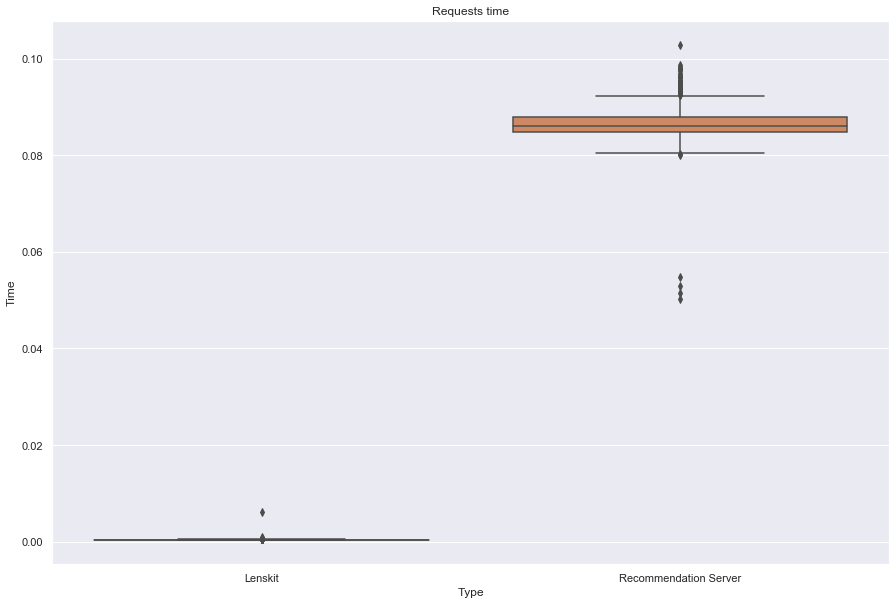

*******************************************************
Algo: biasedmf
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 0.341478
Throughput (requests per second): 2928.449627
Peak response time: 0.005458
Mean response time: 0.000272
Median response time: 0.000265
99 percentile: 0.000295
------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 10.87211
Throughput (requests per second): 91.978464
Peak response time: 0.101846
Mean response time: 0.085913
Median response time: 0.085471
99 percentile: 0.095898


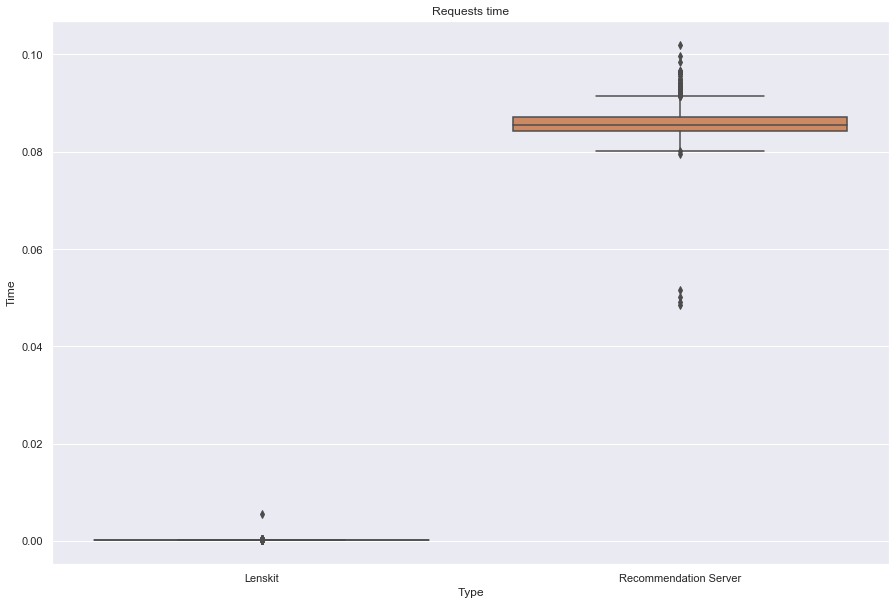

*******************************************************
Algo: itemitem
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 101.676548
Throughput (requests per second): 9.83511
Peak response time: 2.22426
Mean response time: 0.101508
Median response time: 0.050559
99 percentile: 0.679383
------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 52.110227
Throughput (requests per second): 19.190091
Peak response time: 3.86636
Mean response time: 0.412121
Median response time: 0.342963
99 percentile: 1.32436


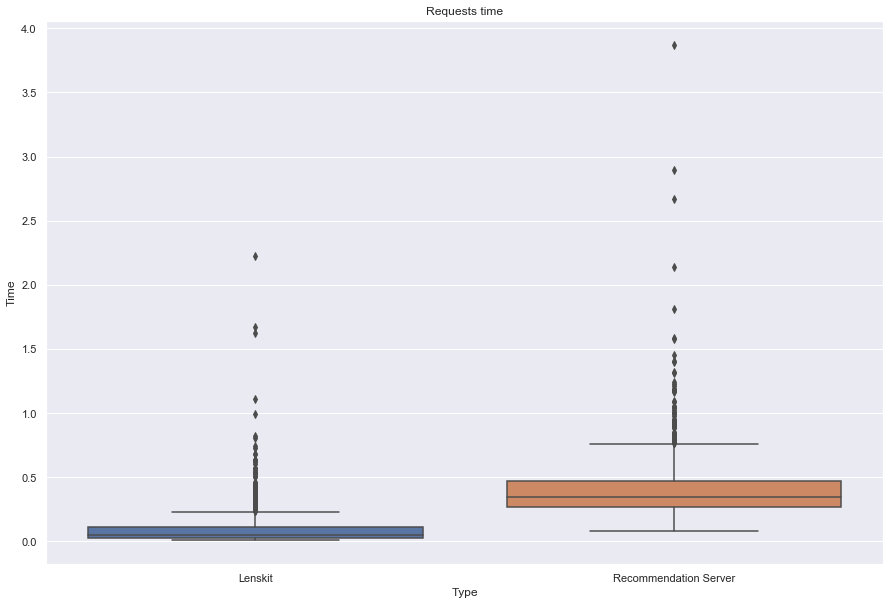

*******************************************************
Algo: tf_bpr
------------------
Lenskit performance:
Number of requests: 1000
Total response time: 26.68567
Throughput (requests per second): 37.473296
Peak response time: 0.200347
Mean response time: 0.02661
Median response time: 0.025739
99 percentile: 0.029865
------------------
Recommendation server performance:
Number of requests: 1000
Total response time: 20.59358
Throughput (requests per second): 48.558822
Peak response time: 0.199767
Mean response time: 0.163299
Median response time: 0.162994
99 percentile: 0.184859


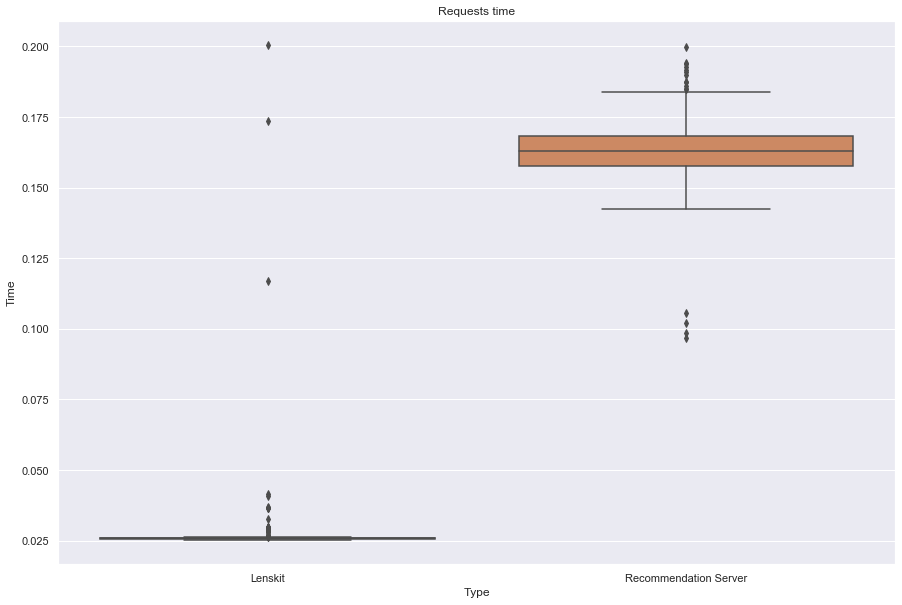

*******************************************************


In [21]:
for lk_recserver_algo in lk_recserver_algos:
    print(f'Algo: {lk_recserver_algo}')
    print('------------------')    
    print('Lenskit performance:')
    file_name = f'lkpy_{lk_recserver_algo}_num_req_{num_requests}.pickle'    
    print_stats_from_file(file_name)
    print('------------------')    
    print('Recommendation server performance:')
    file_name = f'preds_{lk_recserver_algo}_against_lkpy_workers_4_num_req_{num_requests}.pickle'
    print_stats_from_file(file_name)
    
    # boxplot
    df = pd.DataFrame({'Times': [], 'Type': [], 'Algorithm': []})  
    file_name = f'lkpy_{lk_recserver_algo}_num_req_{num_requests}.pickle'
    df = df.append(create_df_lk(file_name, lk_recserver_algo, 'Lenskit'), ignore_index=True)
    file_name = f'preds_{lk_recserver_algo}_against_lkpy_workers_4_num_req_{num_requests}.pickle'    
    df = df.append(create_df_lk(file_name, lk_recserver_algo, 'Recommendation Server'), ignore_index=True)
    plt.title('Requests time')
    ax = sns.boxplot(x="Type", y="Time", data=df)
    plt.show()
    
    print('*******************************************************')    

Let's see in more detail the ItemItem response time.

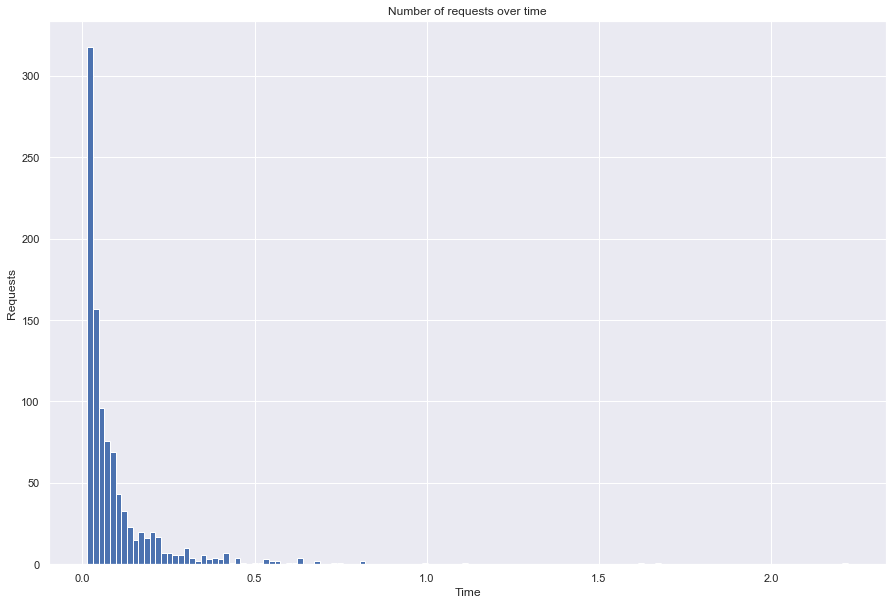

In [17]:
file_name = f'lkpy_itemitem_num_req_{num_requests}.pickle'
hist_numbers(file_name)

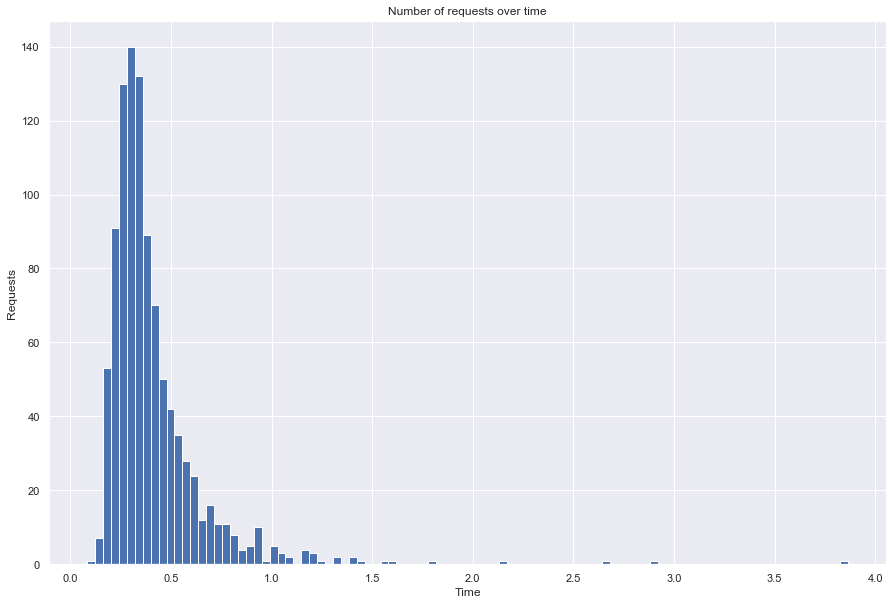

In [16]:
file_name = f'preds_itemitem_against_lkpy_workers_4_num_req_{num_requests}.pickle'
hist_numbers(file_name)

### Speedup Tests

#### Throughput by number of workers

/Users/carlos/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


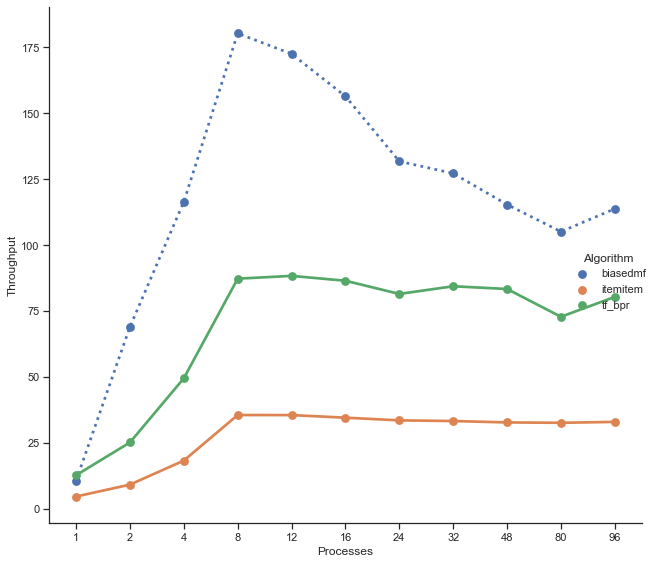

In [19]:
def create_df_linear_perf(file_name, algo):
    throughputs_workers_from_file = np.genfromtxt(file_name, delimiter=',')
    df = pd.DataFrame(throughputs_workers_from_file)
    df['Algorithm'] = algo
    df['Processes'] = workers_config
    df.rename(columns={0:'Throughput'}, inplace=True)
    return df 
    
df_linear = pd.DataFrame({'Throughput': [], 'Algorithm': [], 'Processes': []})  

for algo in linear_speedup_algos:
    throughput_file_name_workers = f'{results_folder}throughput_single_multiple_workers_algo_{algo}.csv'
    df_linear = df_linear.append(create_df_linear_perf(throughput_file_name_workers, algo), ignore_index=True)    

df_linear['Processes'] = df_linear['Processes'].astype('int16')
sns.set(style="ticks")
g = sns.factorplot(x="Processes", y="Throughput", hue="Algorithm", data=df_linear, linestyles=[":", "-","-"], height=8)
g.fig.tight_layout()
plt.show()

#### Plots by number of workers

In [7]:
df = pd.read_csv(f'{results_folder}throughput_single_multiple_workers_algo_tf_bpr.csv', header=None)
df['Workers'] = workers_config
df.rename(columns={0:'Throughput'}, inplace=True) 
df

,Throughput,Workers
0,11.880536,1
1,25.505847,2
2,50.071827,4
3,92.440922,8
4,137.375141,12
5,174.451148,16
6,225.043659,24
7,298.307484,32
8,355.671852,48
9,422.071596,80


Algorithm: biasedmf


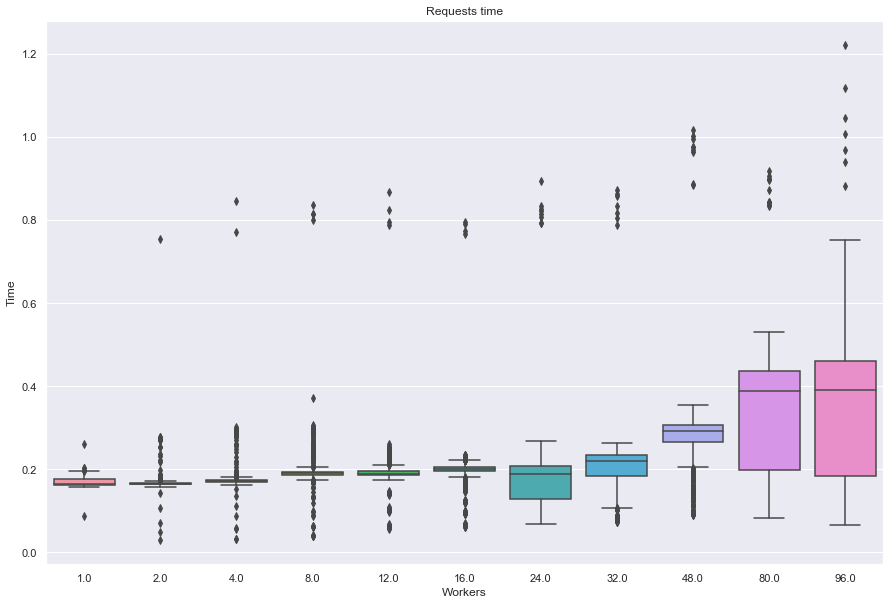

---------------------

Algorithm: itemitem


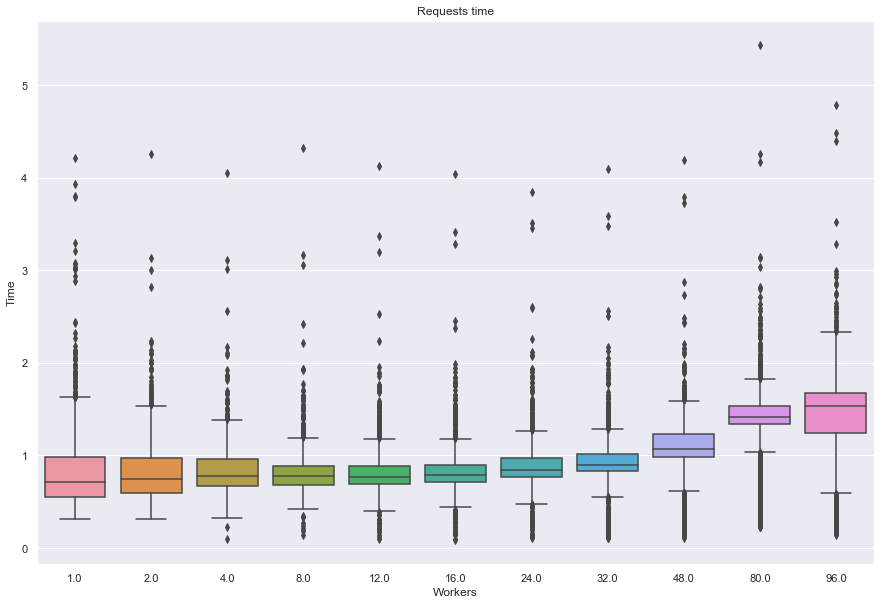

---------------------

Algorithm: tf_bpr


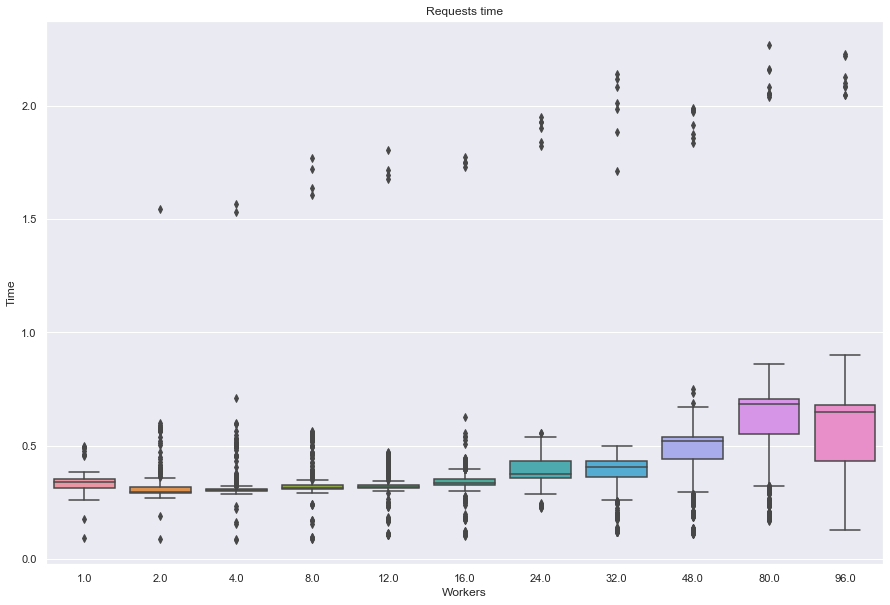

---------------------



In [8]:
sns.set(rc={'figure.figsize':(15, 10)})
for algo in linear_speedup_algos:
    df = pd.DataFrame({'Times': [], 'Workers': [], 'Algorithm': []})
    print(f'Algorithm: {algo}')
    for w in workers_config:
        file_name = f'linear_speedup_preds_{algo}_workers_{w}_num_req_1000.pickle'
        df_temp = create_df(file_name, algo, w)
        df = df.append(df_temp, ignore_index=True)
    plt.title('Requests time')
    ax = sns.boxplot(x="Workers", y="Time", data=df)
    plt.show()
    print('---------------------')
    print('')
#    break

In [11]:
df[df['Workers'] == 24]['Time'].describe()

count    1000.000000
mean        0.183649
std         0.073715
min         0.068007
25%         0.128885
50%         0.188997
75%         0.207774
max         0.893476
Name: Time, dtype: float64

In [12]:
df[df['Workers'] == 48]['Time'].describe()

count    1000.000000
mean        0.269109
std         0.093597
min         0.089307
25%         0.265133
50%         0.291107
75%         0.305615
max         1.016039
Name: Time, dtype: float64

In [13]:
for w in workers_config:
    print(f"Worker: {w}, Mean Time: {df[df['Workers'] == w]['Time'].mean()}")

Worker: 1, Mean Time: 0.16933080368420633
Worker: 2, Mean Time: 0.1678498732119333
Worker: 4, Mean Time: 0.1769776633818401
Worker: 8, Mean Time: 0.19603982038088724
Worker: 12, Mean Time: 0.19488702520968218
Worker: 16, Mean Time: 0.20030749574633955
Worker: 24, Mean Time: 0.18364940203385777
Worker: 32, Mean Time: 0.21081128295401869
Worker: 48, Mean Time: 0.2691085608160647
Worker: 80, Mean Time: 0.3322938989320246
Worker: 96, Mean Time: 0.3337401035259827
